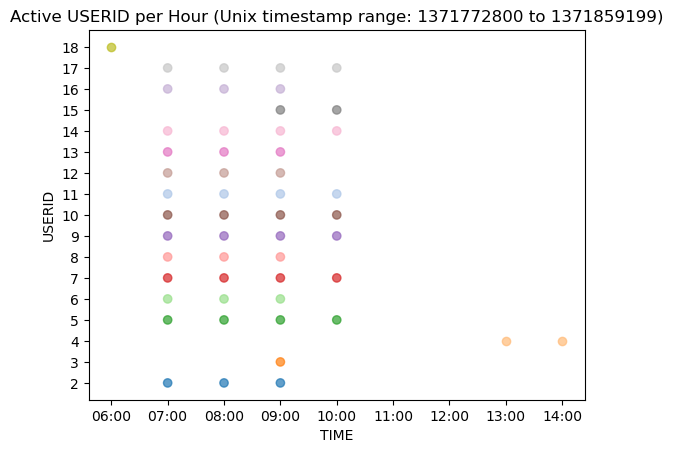

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your CSV file into a DataFrame
df = pd.read_csv('CasusData.csv')

# Assuming your CSV has a column named 'TIMESTAMP' with Unix timestamps
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')

# Filter data for the specified time range
start_timestamp = 1371592800
end_timestamp = 1371852000
df_filtered = df[(df['TIMESTAMP'] >= pd.to_datetime(start_timestamp, unit='s')) & (df['TIMESTAMP'] <= pd.to_datetime(end_timestamp, unit='s'))]

# Group filtered data into 1-hour intervals and get unique USERID values
hourly_user_ids = df_filtered.groupby(df_filtered['TIMESTAMP'].dt.floor('H'))['USERID'].unique()

# Create a dictionary mapping USERID to a unique color
user_id_color_map = {user_id: plt.cm.tab20(i % 20) for i, user_id in enumerate(df_filtered['USERID'].unique())}

# Plot the graph with TIMESTAMP and USERID axes switched
for date, user_ids in hourly_user_ids.items():
    colors = [user_id_color_map[user_id] for user_id in user_ids]
    plt.scatter([date] * len(user_ids), user_ids, alpha=0.7, c=colors, marker='o')

# Check if the DataFrame is not empty before setting y-axis ticks
if not df_filtered.empty:
    # Set y-axis ticks with intervals of 1
    plt.yticks(range(int(min(df_filtered['USERID'])), int(max(df_filtered['USERID'])) + 1))

# Add labels and title
plt.xlabel('TIME')
plt.ylabel('USERID')
plt.title('Active USERID per Hour (Unix timestamp range: 1371772800 to 1371859199)')

# Format x-axis labels to show only the time (hour:minute:second)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Show the plot
plt.show()

